# Music Generation using LSTMs

* Reference taken from:
    * [Karnika Kapoor - Kaggle](https://www.kaggle.com/karnikakapoor/music-generation-lstm/notebook)
    * [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2020/01/how-to-perform-automatic-music-generation/)

In [1]:
import os
from music21 import *
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## 1. Loading and parsing data


In [2]:
# Loading the list of chopin's midi files as stream
filepath = "./data/classical-music-midi/mozart/"
# Getting midi files
all_midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        tr = filepath+i
        midi = converter.parse(tr)
        all_midis.append(midi)

In [3]:
# Helping function
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        # Arranges the midi file contents by instruments
        # Same instruments would be together, so it might rearrange the order of different notes
        songs = instrument.partitionByInstrument(j)
        # Iterate over each instrument
        for part in songs.parts:
            # Calls RecursiveIterator, which is a good way for iterating
            pick = part.recurse()
            # For every element in an instrument, check whether it's a
            # note or a chord
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
# Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the Chopin midis in the dataset:", len(Corpus))


Total notes in all the Chopin midis in the dataset: 55802


## Data Exploration

In [4]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['2.6.9', '9.2', 'G5', '2.6', 'F#5', 'E5', 'F#5', 'A5', '4.7', 'G5', 'F#5', 'G5', 'A5', '6.9', 'A5', 'B5', 'C#6', 'D6', 'A5', 'F#3', 'D4', 'F#5', 'D3', 'D4', 'A5', 'E3', 'G5', 'F#5', 'D4', 'G5', 'A5', 'A3', 'G5', 'C#4', 'F5', '2', 'F#5', 'G5', '2.6', 'F#5', 'E5', 'F#5', 'A5', '4.7', 'G5', 'F#5', 'G5', 'A5', '6.9', 'A5']


In [5]:
from collections import Counter

# Creating a count dictionary
# Since Counter creates a dictionary type object, it will only store unique elements (no duplicates)
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 229


In [10]:
count_num.keys()

dict_keys(['2.6.9', '9.2', 'G5', '2.6', 'F#5', 'E5', 'A5', '4.7', '6.9', 'B5', 'C#6', 'D6', 'F#3', 'D4', 'D3', 'E3', 'A3', 'C#4', 'F5', '2', 'D5', 'F#4', 'A4', '6.7', 'C#5', 'E4', 'G4', 'B3', '7.9', 'G3', '7.11', 'E-5', '8.11', 'B4', 'C#3', 'A2', '4.9', '1.4', '9.1.4', '1.2', 'G#5', 'G#3', 'G#4', 'C5', '4.8', '4.6', '3.4', '2.4', '8.9', '6.8', 'E-4', 'B2', 'G#2', 'E2', '4.6.8', '11.1', '9.11', '9.1', '4.8.11', '8.11.2', '5', '6', '11.2', '11', '11.3', '3.6', 'G2', 'F#2', 'B-4', '9', 'D2', '8', '10', 'F3', 'B-5', 'B-3', '10.1', '10.1.4', 'B1', '11.2.6', '0.2.6', '7', '0.4', 'C4', '2.4.6', 'C3', '2.7', '11.4', 'C6', '9.0', 'F4', '4', 'E6', '9.11.1', '1.4.7', '7.0', '0', '7.9.11', '6.7.9', '6.9.11', '4.7.9', '2.8', '4.6.7', '8.9.11', '1', '4.7.10', '4.7.11', '7.11.2', '2.4.9', '7.9.1', '11.0.2', '9.11.0', '0.2', '1.7', '3', '11.0', '1.2.4', 'E-3', '9.0.3', '5.7.11', '2.5.8', '9.0.4', '0.4.7', 'E-6', '0.2.7', '9.11.0.2', 'C2', '11.2.4', '10.11.1', '2.4.8', '4.10', '1.6', '0.4.6', '11.3.6',

In [11]:
count_num.values()

dict_values([71, 94, 1874, 196, 875, 1906, 1446, 409, 177, 550, 259, 499, 407, 1949, 647, 851, 1703, 555, 1999, 143, 2355, 474, 1778, 48, 892, 1664, 1810, 1038, 270, 1578, 236, 1031, 132, 1171, 124, 264, 157, 200, 162, 86, 457, 563, 450, 2153, 92, 106, 42, 229, 54, 20, 795, 129, 37, 73, 6, 51, 207, 286, 48, 8, 72, 52, 384, 112, 13, 51, 184, 27, 1236, 211, 33, 57, 71, 1167, 682, 1241, 58, 1, 5, 18, 12, 111, 412, 2111, 10, 603, 136, 78, 779, 303, 1551, 133, 119, 3, 8, 238, 130, 16, 9, 4, 21, 52, 8, 5, 53, 25, 10, 27, 1, 5, 11, 12, 333, 23, 60, 130, 9, 357, 8, 12, 5, 6, 49, 127, 1, 1, 22, 13, 4, 8, 37, 6, 1, 1, 25, 1, 235, 32, 10, 1, 11, 64, 152, 1, 1, 20, 9, 217, 85, 295, 341, 4, 10, 203, 51, 240, 84, 109, 14, 9, 40, 69, 14, 81, 18, 192, 189, 241, 9, 44, 116, 106, 140, 10, 2, 4, 10, 5, 19, 2, 29, 2, 6, 22, 14, 2, 34, 11, 41, 26, 6, 5, 7, 2, 4, 8, 8, 12, 16, 23, 24, 9, 11, 6, 3, 1, 3, 10, 6, 1, 8, 4, 2, 33, 51, 6, 6, 3, 2, 2, 9, 3, 3, 3, 3, 1, 2, 2, 2])

In [8]:
# Get the unique note and its corresponding number of occurrences
notes = list(count_num.keys())
no_of_recurrences = list(count_num.values())

# Average recurrence for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrence for a note in Corpus:", Average(no_of_recurrences))
print("Most frequent note in Corpus appeared:", max(no_of_recurrences), "times")
print("Least frequent note in Corpus appeared:", min(no_of_recurrences), "time")

Average recurrence for a note in Corpus: 243.6768558951965
Most frequent note in Corpus appeared: 2355 times
Least frequent note in Corpus appeared: 1 time


We now plot a histogram depicting the distribution of notes wrt the number of occurrences of some group of notes (binned)

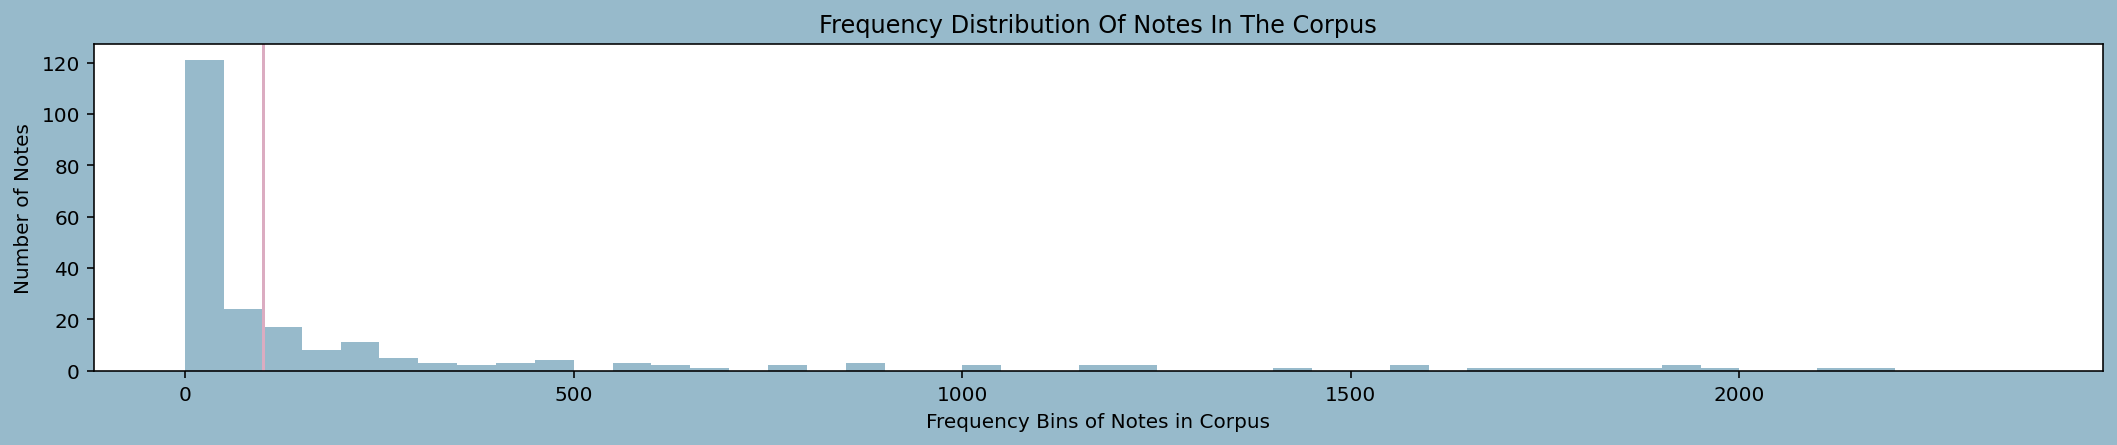

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# Plotting the distribution of notes
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(no_of_recurrences)), 50)
plt.hist(no_of_recurrences, bins=bins, color="#97BACB")
plt.axvline(x=100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Bins of Notes in Corpus")
plt.ylabel("Number of Notes")
plt.show()